# Textiles Mexicanos
Se importan las librerías básicas

## 1 Preprocesamiento

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

Se realiza la matriz de correlación

In [2]:
features = pd.read_csv("Limpio.csv")
features = features.iloc[:,1:]
corr = features.corr()
features.corr()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,y
x0,1.000000e+00,-3.971236e-16,1.936599e-16,-1.816827e-17,-4.267035e-17,-4.384135e-17,-2.307012e-17,-1.486790e-16,1.410305e-16,6.389167e-17,...,-1.022033e-16,6.009275e-17,-3.697238e-18,-1.945715e-17,5.379810e-17,1.034494e-16,6.250347e-17,-2.595542e-17,-4.810225e-17,0.027274
x1,-3.971236e-16,1.000000e+00,-2.359307e-16,9.712440e-17,-1.553301e-16,1.886325e-17,5.807546e-17,-1.359459e-16,3.504443e-16,-3.467975e-16,...,-4.789036e-17,-1.844318e-16,6.994412e-17,-1.241384e-16,5.136797e-17,7.956741e-17,-1.170164e-18,-5.998448e-17,4.730475e-17,0.057094
x2,1.936599e-16,-2.359307e-16,1.000000e+00,1.248834e-17,3.580568e-16,-3.873719e-17,-7.799839e-17,-1.309476e-16,-1.305784e-16,8.723108e-17,...,-6.543264e-18,-2.054392e-17,-1.129884e-16,-5.214581e-17,7.764213e-17,-4.132840e-17,-8.299681e-18,-4.200478e-17,8.229849e-17,0.522280
x3,-1.816827e-17,9.712440e-17,1.248834e-17,1.000000e+00,1.082309e-16,2.041934e-17,-1.306774e-16,2.441880e-16,-3.970763e-16,1.760395e-16,...,8.355112e-17,-2.007577e-17,-4.057489e-17,8.506111e-17,-6.513899e-17,1.761721e-17,1.308402e-16,-9.604102e-17,2.862899e-17,0.363752
x4,-4.267035e-17,-1.553301e-16,3.580568e-16,1.082309e-16,1.000000e+00,2.057993e-16,-1.065410e-16,-1.119074e-17,9.032086e-17,6.763303e-17,...,1.858378e-17,-6.939107e-17,1.589320e-16,1.120696e-16,4.571062e-17,-5.938518e-17,-5.305166e-17,2.512474e-17,3.153101e-17,-0.594092
x5,-4.384135e-17,1.886325e-17,-3.873719e-17,2.041934e-17,2.057993e-16,1.000000e+00,3.536650e-16,-1.389301e-16,-1.458959e-16,-9.456393e-17,...,-3.962104e-17,-2.732854e-17,-9.994608e-17,-1.017244e-16,3.271810e-17,-1.058144e-16,-8.131160e-17,-1.548312e-18,1.003308e-16,0.027530
x6,-2.307012e-17,5.807546e-17,-7.799839e-17,-1.306774e-16,-1.065410e-16,3.536650e-16,1.000000e+00,2.290403e-16,9.932744e-17,-1.708619e-16,...,-7.789131e-17,-8.898768e-17,2.460206e-16,8.946348e-17,-4.238371e-17,3.527580e-17,2.648188e-17,-4.108660e-17,4.373087e-17,0.042541
x7,-1.486790e-16,-1.359459e-16,-1.309476e-16,2.441880e-16,-1.119074e-17,-1.389301e-16,2.290403e-16,1.000000e+00,8.346191e-18,-1.206914e-16,...,-2.953837e-17,2.216154e-16,-1.364885e-16,6.293211e-17,-1.758632e-18,-5.971515e-17,9.034225e-17,7.114736e-17,1.974300e-18,-0.034914
x8,1.410305e-16,3.504443e-16,-1.305784e-16,-3.970763e-16,9.032086e-17,-1.458959e-16,9.932744e-17,8.346191e-18,1.000000e+00,1.846415e-16,...,2.988389e-17,-6.841571e-17,-2.588772e-16,1.945136e-16,5.871403e-17,7.431652e-17,1.360408e-16,3.225413e-17,-8.331307e-17,0.002357
x9,6.389167e-17,-3.467975e-16,8.723108e-17,1.760395e-16,6.763303e-17,-9.456393e-17,-1.708619e-16,-1.206914e-16,1.846415e-16,1.000000e+00,...,-7.142641e-17,1.072930e-16,-1.789048e-16,9.412671e-18,1.518394e-17,-7.894288e-17,2.043378e-16,-1.500764e-17,5.929833e-17,0.087943


Juntamos las variables dependientes e independientes

In [3]:
# Se cargan las agrupaciones ( 1, 1, ..., 3)
labels = pd.read_csv("db/Labels.csv")
labels = labels.iloc[:,2].values

# Se añade una nueva columna ( x1, x2, ... , xn, y)
features["y"] = labels
features.to_csv("Regresion.csv")

# Separación de variable dependiente e independientes
X = features.iloc[:,:-1].values
Y = features.iloc[:,-1].values

Separamos los datos de prueba y entrenamiento

In [4]:
# PREPROCESAMIENTO
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

print(X[0:1])
print(Y[0:1])

[[ 0.00337295 -0.06090929  0.04436981 -0.07733339 -0.12020049  0.04915178
  -0.09281499 -0.12902319  0.20866329 -0.09260902 -0.14523923 -0.02626722
  -0.13717878  0.06608574  0.04010848 -0.02227136  0.02576424 -0.04034996
  -0.02892124  0.0150692 ]]
[4]


## 2 Regresión

### 2.1 Bosques Aleatorios

[1 0 0 1 0 1 5 0 0 3 4 2 5 4 4 2 5 4 0 3 4 4 0 2 1 1 4 4 4 2 0 2 4 2 1 1 0
 4 4 5 4 2 2 2 4 1 3 2 2 5 1 4 1 2 2 4 3 4 2 4 4 0 2 1 0 3 3 0 0 5 1 3 4 0
 5 2 4 2 2 5 0 5 5 4 3 2 0 1 5 2 2 2 2 2 1 4 5 0 1 5 1 3 1 5 3 0 2 5 4 2 2
 1 2 4 2 0 3 4 0 3 4 2 4 4 0 0 0 4 0 1 0 2 0 0 4 5 0 2 2 4 2 0 1 4 1 0 2 4
 1 0 0 2 1 1 1 4 2 2 1 2 1 5 4 4 2 1 2 4 2 5 1 1 1 2 1 3 4 1 0 5 2 1 0 2 2
 0 0 4 2 4 0 1 1 2 5 4 0 2 1 1 3 0 2 5 4 3 5 2 4]


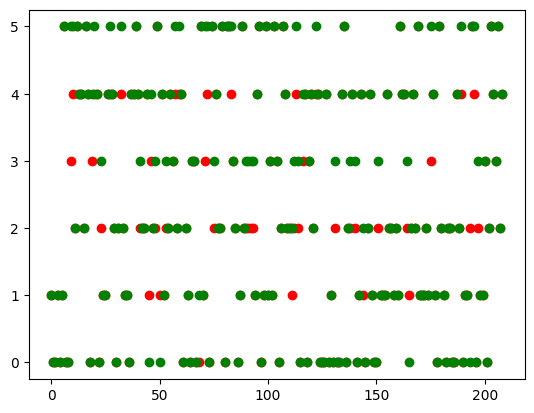

In [5]:
# BOSQUES ALEATORIOS
from sklearn.ensemble import RandomForestRegressor

# Entrenamiento
random_forest = RandomForestRegressor(n_estimators=100,random_state=0)
random_forest.fit(xtrain,ytrain)

# Predicción
ypred_rndfrst = random_forest.predict(xtest)
ypred_rndfrst = np.int32(ypred_rndfrst)
print(ypred_rndfrst)

# Visualización
xgrid = np.arange(0,len(ytest))
plt.scatter(xgrid,ypred_rndfrst,c="r")
plt.scatter(xgrid,ytest,c="g")

### 2.2 Máquinas de Soporte de Regresión

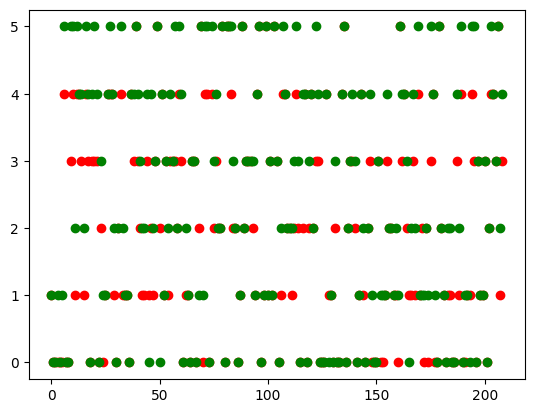

In [37]:
from sklearn.svm import SVR

# Entrenamiento
svr_regressor = SVR(kernel="rbf")
svr_regressor.fit(xtrain,ytrain)

# Predicción
y_predsvr = svr_regressor.predict(xtest)
y_predsvr = np.int32(y_predsvr)

# Resultados
plt.scatter(xgrid,y_predsvr,c="r")
plt.scatter(xgrid,ytest,c="g")

### 2.3 Regresión por árboles de decisión

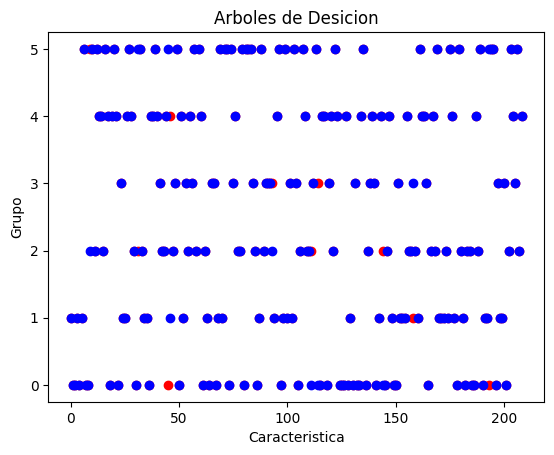

In [38]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(xtrain,ytrain)

ypred_regtree =  reg_tree.predict(xtest)

plt.scatter(xgrid,ytest,color="red")
plt.scatter(xgrid,ypred_regtree, color="blue")
plt.title("Arboles de Desicion")
plt.xlabel("Caracteristica")
plt.ylabel("Grupo")
plt.show()